In [1]:
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
from glob import glob
import os
rdir = 'results'
if not os.path.exists('../paper/figs/'+rdir):
    os.mkdir('../paper/figs/'+rdir)
frames = []
for f in glob(rdir+'/*.csv'):
    df = pd.read_csv(f)
    frames.append(df)
    
# convert train column to 'train', 'test'
df_all = pd.concat(frames)
for m, dfgm in df_all.groupby('method'):
    for d, dfgmd in dfgm.groupby('dataset'):
        print('# results for',m,'on',d,':',len(dfgmd))
df_all['fold'] = df_all['train'].apply(lambda x: 'train' if x else 'test')
print(df_all.method.unique())
Order = ['gerryfair',
         'gerryfair_xgb',
         'feat_random_p100_g0',
         'feat_tourn',
         'feat_lex',
         'feat_nsga2',
#          'feat_flex',
         'feat_flex2',
#          'feat_flex_nsga2',
         'feat_flex2_nsga2']
method_nice = {
    'gerryfair':'GerryFair',
    'gerryfair_xgb':'GerryFairGB',
    'feat_lex':'LEX',
    'feat_random_p100_g0':'Random',
    'feat_tourn':'Tourn',
    'feat_flex2':'FLEX',
    'feat_nsga2':'NSGA2',
    'feat_flex_nsga2':'FLEX-NSGA2',
    'feat_flex2_nsga2':'FLEX-NSGA2',
}
print(df_all.method.unique())
print('seeds (',df_all.seed.nunique(),'):',','.join([str(i) for i in df_all.seed.unique()]))
df_all = df_all.loc[df_all.method.isin(Order)]
df_all['method_nice'] = df_all['method'].apply(lambda x: method_nice[x])

df_train = df_all[df_all.fold=='train']
df_test = df_all[df_all.fold=='test']
OrderNice = [method_nice[x] for x in Order]

# results for feat_flex2 on adult : 600
# results for feat_flex2 on communities : 600
# results for feat_flex2 on lawschool : 600
# results for feat_flex2 on student : 600
# results for feat_flex2_nsga2 on adult : 600
# results for feat_flex2_nsga2 on communities : 600
# results for feat_flex2_nsga2 on lawschool : 600
# results for feat_flex2_nsga2 on student : 600
# results for feat_lex on adult : 600
# results for feat_lex on communities : 600
# results for feat_lex on lawschool : 600
# results for feat_lex on student : 600
# results for feat_nsga2 on adult : 600
# results for feat_nsga2 on communities : 600
# results for feat_nsga2 on lawschool : 600
# results for feat_nsga2 on student : 600
# results for feat_random_p100_g0 on adult : 600
# results for feat_random_p100_g0 on communities : 600
# results for feat_random_p100_g0 on lawschool : 600
# results for feat_random_p100_g0 on student : 600
# results for feat_tourn on adult : 600
# results for feat_tourn on communities : 600
# 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('viridis')

/home/bill/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_all

,dataset,hv(auditor_fn_violation:accuracy),hv(auditor_fn_violation:auc_prc),hv(auditor_fn_violation:ave_precision_score),hv(auditor_fp_violation:accuracy),hv(auditor_fp_violation:auc_prc),hv(auditor_fp_violation:ave_precision_score),method,seed,time,train,fold,method_nice
0,lawschool,NaN,NaN,NaN,1.785702,NaN,NaN,feat_flex2,12092,4360.515193,True,train,FLEX
1,lawschool,NaN,NaN,NaN,1.759699,NaN,NaN,feat_flex2,12092,4360.515193,False,test,FLEX
2,lawschool,NaN,NaN,NaN,NaN,NaN,1.875825,feat_flex2,12092,4360.515193,True,train,FLEX
3,lawschool,NaN,NaN,NaN,NaN,NaN,1.841547,feat_flex2,12092,4360.515193,False,test,FLEX
4,lawschool,NaN,NaN,NaN,NaN,1.875666,NaN,feat_flex2,12092,4360.515193,True,train,FLEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,lawschool,1.756404,NaN,NaN,NaN,NaN,NaN,feat_tourn,10197,3982.894956,False,test,Tourn
8,lawschool,NaN,NaN,1.87479,NaN,NaN,NaN,feat_tourn,10197,3982.894956,True,train,Tourn
9,lawschool,NaN,NaN,1.83148,NaN,NaN,NaN,feat_tourn,10197,3982.894956,False,test,Tourn
10,lawschool,NaN,1.874594,NaN,NaN,NaN,NaN,feat_tourn,10197,3982.894956,True,train,Tourn


## training results

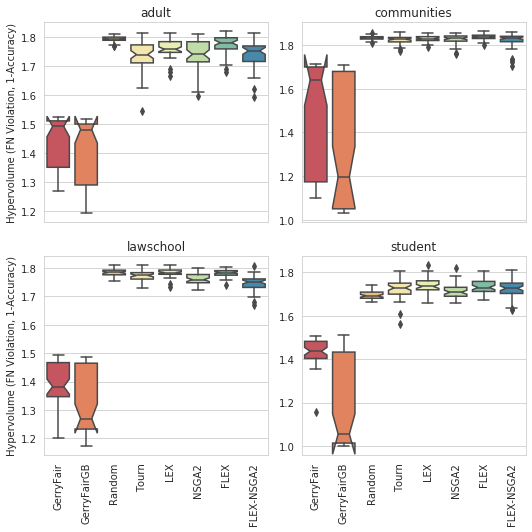

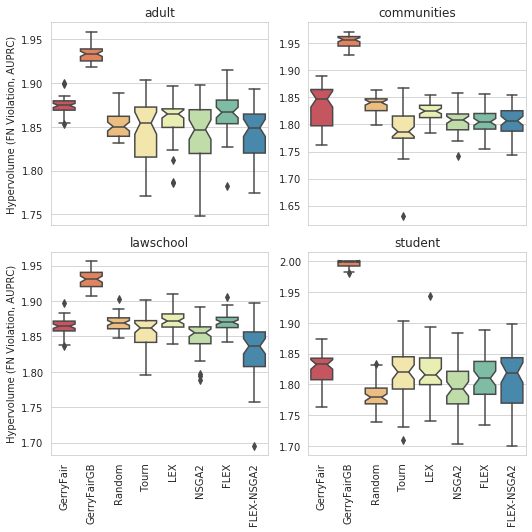

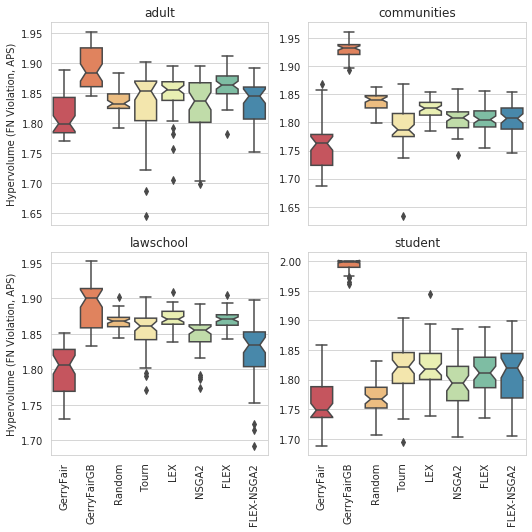

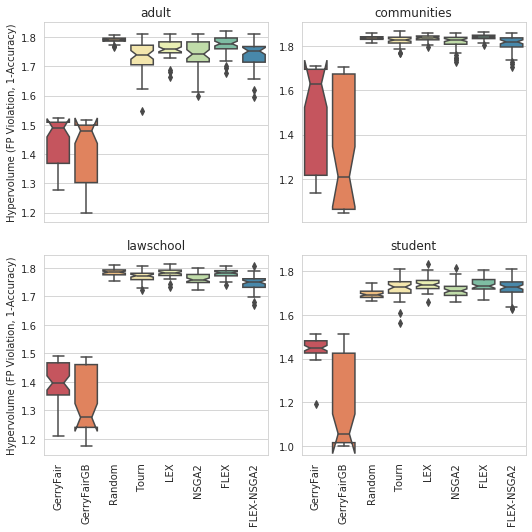

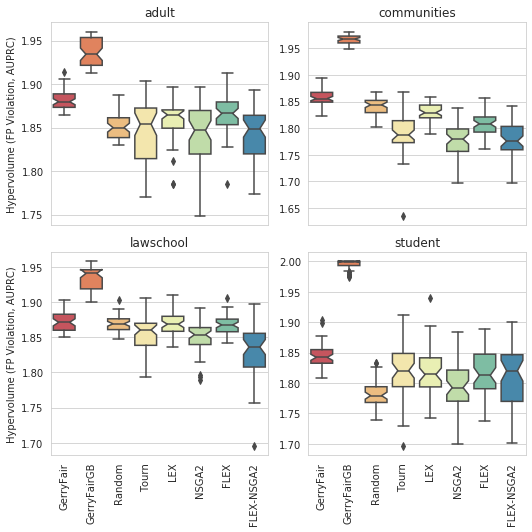

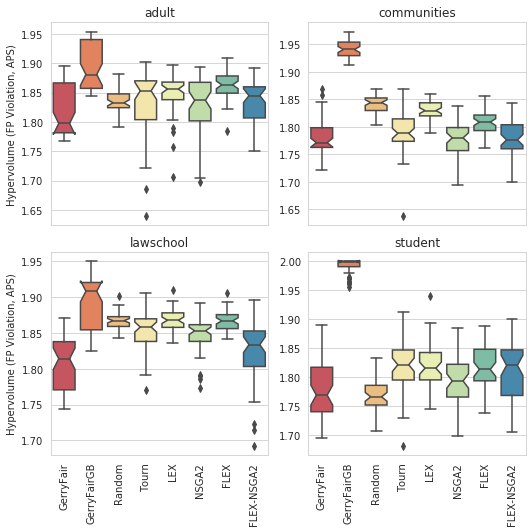

In [4]:
plot_cols = [c for c in df_all.columns if 'hv' in c]

metric_nice = {
    'auditor_fn_violation':'FN Violation',
    'auditor_fp_violation':'FP Violation',
    'accuracy':'1-Accuracy',
    'auc_prc':'AUPRC',
    'ave_precision_score':'APS'
}
for col in plot_cols:
    h = plt.figure(figsize=(7.5,7.5))
    i = 1
    for dataset,dfg in df_train.groupby('dataset'):
        ax = h.add_subplot(2,2,i)
        sns.boxplot(data=dfg, x='method_nice',y=col, notch=True, order=OrderNice,palette='Spectral')
        plt.title(dataset)
        y1 = metric_nice[col.split('(')[-1].split(':')[0]]
        y2 = metric_nice[col.split(':')[-1][:-1]]
        if i%2 !=0:
            plt.ylabel('Hypervolume (' + y1 +', '+y2+')')
        else:
            plt.ylabel('')
        if i < 3:
            ax.set_xticklabels([])
            ax.set_xlabel('')
        else:
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.xlabel('')
        i += 1
    
    plt.tight_layout()
    plt.savefig('../paper/figs/'+rdir+'/training_'+col.replace('(','-').replace(':','-')[:-1] +'.pdf',
               bbox_inches='tight')


## test results

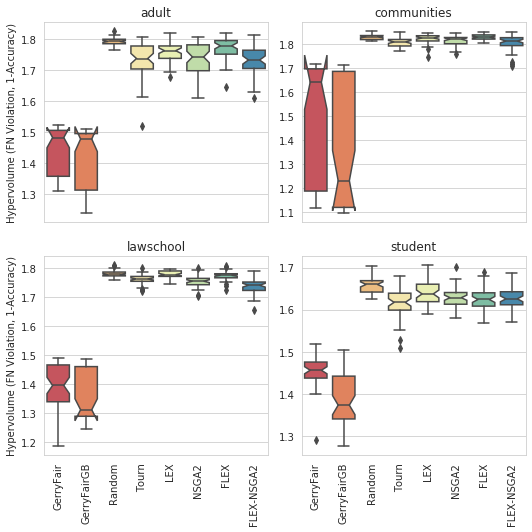

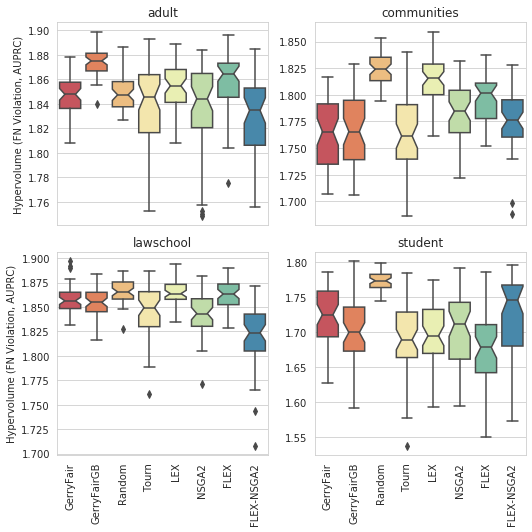

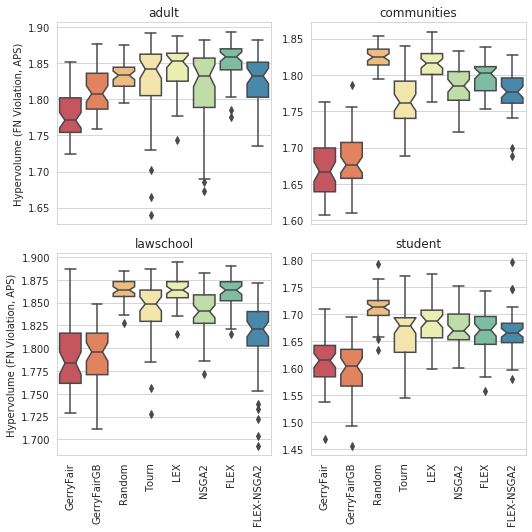

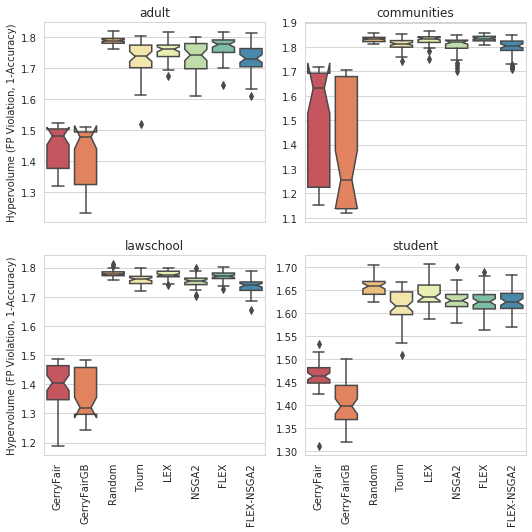

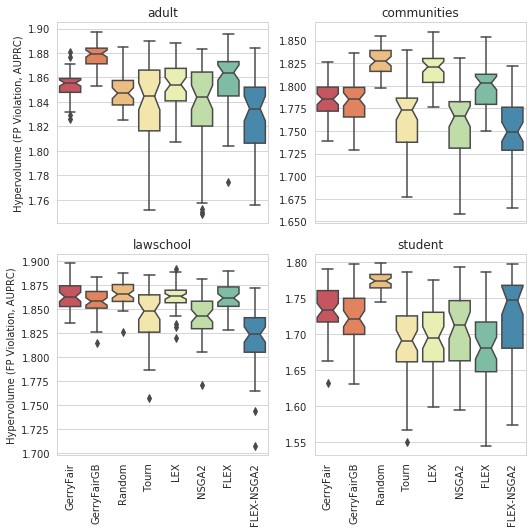

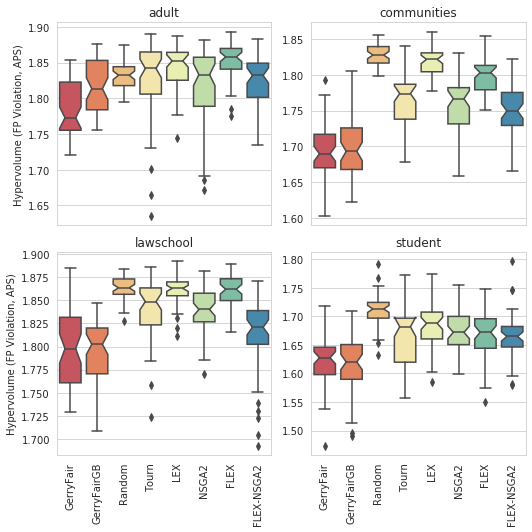

In [5]:
# test figures

plot_cols = [c for c in df_all.columns if 'hv' in c]

metric_nice = {
    'auditor_fn_violation':'FN Violation',
    'auditor_fp_violation':'FP Violation',
    'accuracy':'1-Accuracy',
    'auc_prc':'AUPRC',
    'ave_precision_score':'APS'
}
for col in plot_cols:
    h = plt.figure(figsize=(7.5,7.5))
    i = 1
    for dataset,dfg in df_test.groupby('dataset'):
        ax = h.add_subplot(2,2,i)
        sns.boxplot(data=dfg, x='method_nice',y=col, notch=True, order=OrderNice,palette='Spectral')
        plt.title(dataset)
        y1 = metric_nice[col.split('(')[-1].split(':')[0]]
        y2 = metric_nice[col.split(':')[-1][:-1]]
        if i%2 !=0:
            plt.ylabel('Hypervolume (' + y1 +', '+y2+')')
        else:
            plt.ylabel('')
        if i < 3:
            ax.set_xticklabels([])
            ax.set_xlabel('')
        else:
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.xlabel('')
        i += 1
    
    plt.tight_layout()
    plt.savefig('../paper/figs/'+rdir+'/'+col.replace('(','-').replace(':','-')[:-1] +'.pdf',
               bbox_inches='tight')


In [6]:
# get rankings
# tmp = df_reg.groupby(['dataset','method'])['score']
ranks = []
plot_cols = [c for c in df_all.columns if 'hv' in c]
print('plot_cols:',plot_cols)
df_ranks = pd.DataFrame(dtype=float)
df_sum_norms = pd.DataFrame(dtype=float)
df_norms = df_test

first = True
import pdb
for col in plot_cols:
    df_norms[col+'_norm']=df_test.groupby(['dataset'])[col].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()))
    df_tmp_med = pd.DataFrame(dtype=float)
    df_tmp_med[col] = df_test.groupby(['dataset','method','seed'])[col].median()
    df_tmp_med['rank_'+col] = df_tmp_med.groupby(['dataset','seed'])[col].rank(ascending=False)
    df_tmp = pd.DataFrame({"rank_"+col: df_tmp_med.groupby(['dataset','seed'])[col].rank(ascending=False)}
                          ).reset_index()
#     print(df_tmp[:10])
#     ranks.append(df_tmp)
    if first:
        df_ranks = df_tmp
        df_meds = df_tmp_med
        first = False
    else:
        df_ranks = df_ranks.merge(df_tmp, how='inner',on=['dataset','method','seed'])
        df_meds = df_tmp_med.merge(df_tmp_med, how='inner',on=['dataset','method','seed'])
#     df_ranks.merge(df_tmp)
df_ranks['method_nice'] = df_ranks['method'].apply(lambda x:method_nice[x])    
# df_ranks = pd.concat(ranks)
df_ranks.to_csv('hv_rankings_'+rdir+'.csv',index=False)

plot_cols: ['hv(auditor_fn_violation:accuracy)', 'hv(auditor_fn_violation:auc_prc)', 'hv(auditor_fn_violation:ave_precision_score)', 'hv(auditor_fp_violation:accuracy)', 'hv(auditor_fp_violation:auc_prc)', 'hv(auditor_fp_violation:ave_precision_score)']


/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
for (d,s), dfg in df_meds.groupby(['dataset','seed']):
    print(d,s,dfg)

adult 871                                   hv(auditor_fp_violation:ave_precision_score)_x  \
dataset method              seed                                                   
adult   feat_flex2          871                                         1.878754   
        feat_flex2_nsga2    871                                         1.858778   
        feat_lex            871                                         1.801690   
        feat_nsga2          871                                         1.865088   
        feat_random_p100_g0 871                                         1.855613   
        feat_tourn          871                                         1.865837   
        gerryfair           871                                         1.825779   
        gerryfair_xgb       871                                         1.857360   

                                  rank_hv(auditor_fp_violation:ave_precision_score)_x  \
dataset method              seed                            

adult 8653                                   hv(auditor_fp_violation:ave_precision_score)_x  \
dataset method              seed                                                   
adult   feat_flex2          8653                                        1.867576   
        feat_flex2_nsga2    8653                                        1.786552   
        feat_lex            8653                                        1.864519   
        feat_nsga2          8653                                        1.784812   
        feat_random_p100_g0 8653                                        1.842714   
        feat_tourn          8653                                        1.846174   
        gerryfair           8653                                        1.847901   
        gerryfair_xgb       8653                                        1.851747   

                                  rank_hv(auditor_fp_violation:ave_precision_score)_x  \
dataset method              seed                           

communities 21353                                        hv(auditor_fp_violation:ave_precision_score)_x  \
dataset     method              seed                                                    
communities feat_flex2          21353                                        1.778802   
            feat_flex2_nsga2    21353                                        1.769980   
            feat_lex            21353                                        1.816493   
            feat_nsga2          21353                                        1.782209   
            feat_random_p100_g0 21353                                        1.834689   
            feat_tourn          21353                                        1.775055   
            gerryfair           21353                                        1.712315   
            gerryfair_xgb       21353                                        1.683426   

                                       rank_hv(auditor_fp_violation:ave_precision_score)_x 

communities 26311                                        hv(auditor_fp_violation:ave_precision_score)_x  \
dataset     method              seed                                                    
communities feat_flex2          26311                                        1.823603   
            feat_flex2_nsga2    26311                                        1.776503   
            feat_lex            26311                                        1.838087   
            feat_nsga2          26311                                        1.782841   
            feat_random_p100_g0 26311                                        1.839691   
            feat_tourn          26311                                        1.698309   
            gerryfair           26311                                        1.676269   
            gerryfair_xgb       26311                                        1.693479   

                                       rank_hv(auditor_fp_violation:ave_precision_score)_x 

student 12092                                    hv(auditor_fp_violation:ave_precision_score)_x  \
dataset method              seed                                                    
student feat_flex2          12092                                        1.654266   
        feat_flex2_nsga2    12092                                        1.682169   
        feat_lex            12092                                        1.699362   
        feat_nsga2          12092                                        1.723673   
        feat_random_p100_g0 12092                                        1.717945   
        feat_tourn          12092                                        1.696701   
        gerryfair           12092                                        1.617201   
        gerryfair_xgb       12092                                        1.585465   

                                   rank_hv(auditor_fp_violation:ave_precision_score)_x  \
dataset method              seed             

student 26311                                    hv(auditor_fp_violation:ave_precision_score)_x  \
dataset method              seed                                                    
student feat_flex2          26311                                        1.641638   
        feat_flex2_nsga2    26311                                        1.652399   
        feat_lex            26311                                        1.661988   
        feat_nsga2          26311                                        1.638255   
        feat_random_p100_g0 26311                                        1.662550   
        feat_tourn          26311                                        1.681279   
        gerryfair           26311                                        1.588664   
        gerryfair_xgb       26311                                        1.586834   

                                   rank_hv(auditor_fp_violation:ave_precision_score)_x  \
dataset method              seed             

In [8]:
df_norms

,dataset,hv(auditor_fn_violation:accuracy),hv(auditor_fn_violation:auc_prc),hv(auditor_fn_violation:ave_precision_score),hv(auditor_fp_violation:accuracy),hv(auditor_fp_violation:auc_prc),hv(auditor_fp_violation:ave_precision_score),method,seed,time,train,fold,method_nice,hv(auditor_fn_violation:accuracy)_norm,hv(auditor_fn_violation:auc_prc)_norm,hv(auditor_fn_violation:ave_precision_score)_norm,hv(auditor_fp_violation:accuracy)_norm,hv(auditor_fp_violation:auc_prc)_norm,hv(auditor_fp_violation:ave_precision_score)_norm
1,lawschool,NaN,NaN,NaN,1.759699,NaN,NaN,feat_flex2,12092,4360.515193,False,test,FLEX,NaN,NaN,NaN,0.917668,NaN,NaN
3,lawschool,NaN,NaN,NaN,NaN,NaN,1.841547,feat_flex2,12092,4360.515193,False,test,FLEX,NaN,NaN,NaN,NaN,NaN,0.746794
5,lawschool,NaN,NaN,NaN,NaN,1.841720,NaN,feat_flex2,12092,4360.515193,False,test,FLEX,NaN,NaN,NaN,NaN,0.706442,NaN
7,lawschool,1.766913,NaN,NaN,NaN,NaN,NaN,feat_flex2,12092,4360.515193,False,test,FLEX,0.929973,NaN,NaN,NaN,NaN,NaN
9,lawschool,NaN,NaN,1.849414,NaN,NaN,NaN,feat_flex2,12092,4360.515193,False,test,FLEX,NaN,NaN,0.778744,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,lawschool,NaN,NaN,NaN,NaN,NaN,1.829848,feat_tourn,10197,3982.894956,False,test,Tourn,NaN,NaN,NaN,NaN,NaN,0.688064
5,lawschool,NaN,NaN,NaN,NaN,1.829503,NaN,feat_tourn,10197,3982.894956,False,test,Tourn,NaN,NaN,NaN,NaN,0.642020,NaN
7,lawschool,1.756404,NaN,NaN,NaN,NaN,NaN,feat_tourn,10197,3982.894956,False,test,Tourn,0.913174,NaN,NaN,NaN,NaN,NaN
9,lawschool,NaN,NaN,1.831480,NaN,NaN,NaN,feat_tourn,10197,3982.894956,False,test,Tourn,NaN,NaN,0.689575,NaN,NaN,NaN


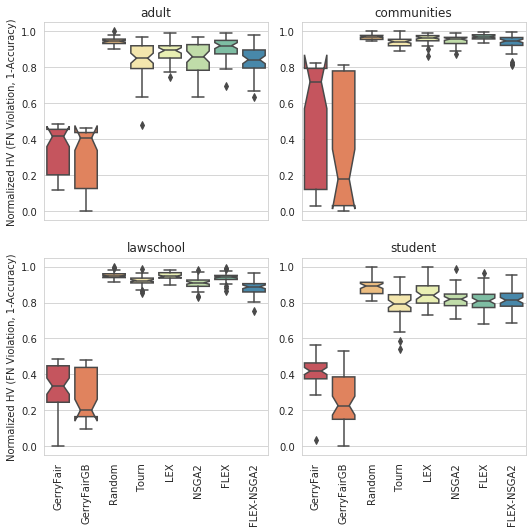

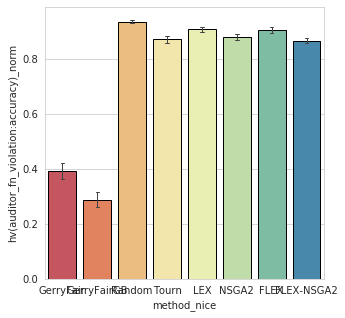

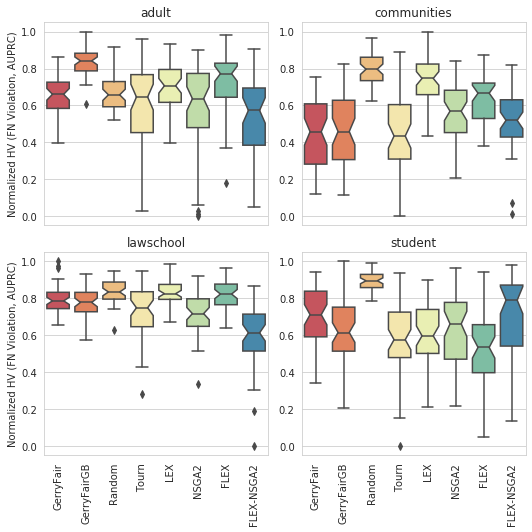

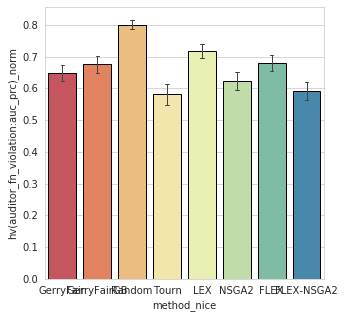

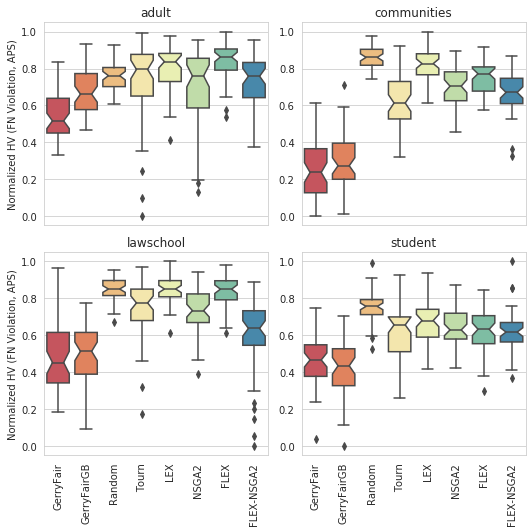

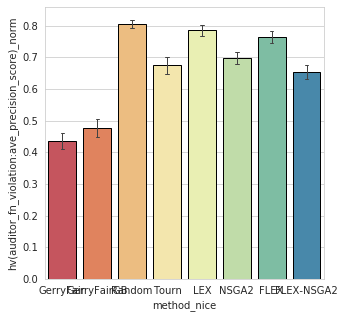

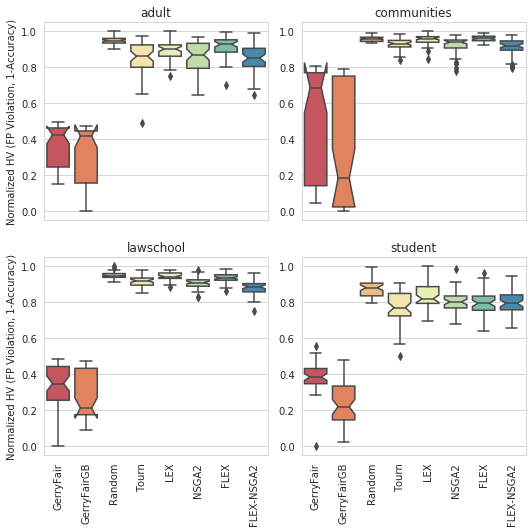

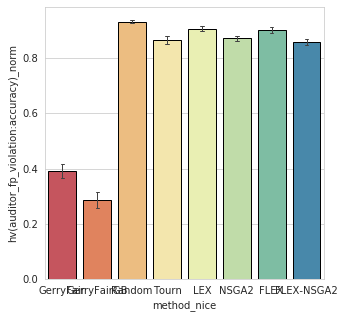

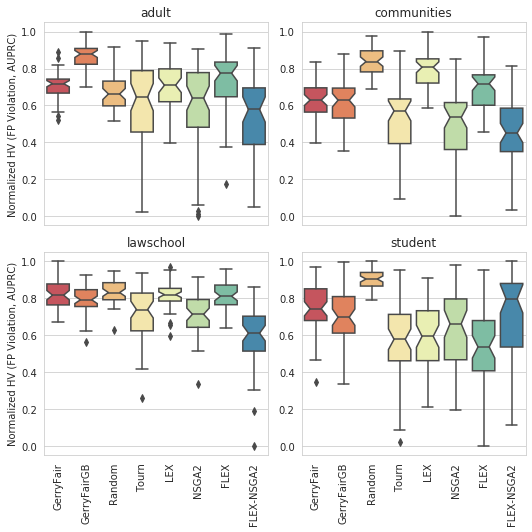

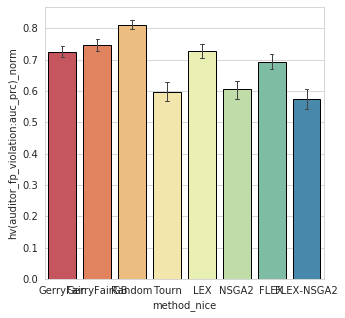

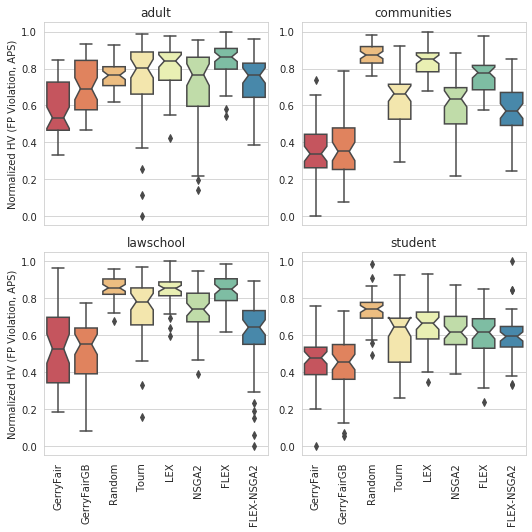

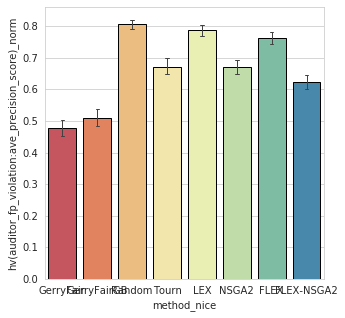

In [9]:
plot_cols = [c for c in df_norms.columns if 'hv' in c and 'norm' in c]

# df_test = df_norms[df_norms.fold=='test']
metric_nice = {
    'auditor_fn_violation':'FN Violation',
    'auditor_fp_violation':'FP Violation',
    'accuracy':'1-Accuracy',
    'auc_prc':'AUPRC',
    'ave_precision_score':'APS'
}
for col in plot_cols:
    h = plt.figure(figsize=(7.5,7.5))
    i = 1
    for dataset,dfg in df_norms.groupby('dataset'):
        ax = h.add_subplot(2,2,i)
        sns.boxplot(data=dfg, x='method_nice',y=col, notch=True, order=OrderNice,palette='Spectral')
        plt.title(dataset)
        y1 = metric_nice[col.split('(')[-1].split(':')[0]]
        y2 = metric_nice[col.split(':')[-1][:-6]]
        if i%2 !=0:
            plt.ylabel('Normalized HV (' + y1 +', '+y2+')')
        else:
            plt.ylabel('')
        if i < 3:
            ax.set_xticklabels([])
            ax.set_xlabel('')
        else:
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.xlabel('')
        i += 1
    
    plt.tight_layout()
    plt.savefig('../paper/figs/'+rdir+'/'+col.replace('(','-').replace(':','-')[:-6] +'_normalized.pdf',
               bbox_inches='tight')

    j = plt.figure(figsize=(5,5))
    sns.barplot(data=df_norms, x = 'method_nice', y=col,
                edgecolor=(0,0,0),capsize=0.1,errwidth=1,
                fill=True,palette='Spectral',
                order=OrderNice)
    

In [10]:
df_ranks.method_nice.unique()
from itertools import combinations
list(combinations(df_ranks.method_nice.unique(),2))

[('FLEX', 'FLEX-NSGA2'),
 ('FLEX', 'LEX'),
 ('FLEX', 'NSGA2'),
 ('FLEX', 'Random'),
 ('FLEX', 'Tourn'),
 ('FLEX', 'GerryFair'),
 ('FLEX', 'GerryFairGB'),
 ('FLEX-NSGA2', 'LEX'),
 ('FLEX-NSGA2', 'NSGA2'),
 ('FLEX-NSGA2', 'Random'),
 ('FLEX-NSGA2', 'Tourn'),
 ('FLEX-NSGA2', 'GerryFair'),
 ('FLEX-NSGA2', 'GerryFairGB'),
 ('LEX', 'NSGA2'),
 ('LEX', 'Random'),
 ('LEX', 'Tourn'),
 ('LEX', 'GerryFair'),
 ('LEX', 'GerryFairGB'),
 ('NSGA2', 'Random'),
 ('NSGA2', 'Tourn'),
 ('NSGA2', 'GerryFair'),
 ('NSGA2', 'GerryFairGB'),
 ('Random', 'Tourn'),
 ('Random', 'GerryFair'),
 ('Random', 'GerryFairGB'),
 ('Tourn', 'GerryFair'),
 ('Tourn', 'GerryFairGB'),
 ('GerryFair', 'GerryFairGB')]

## note: stats.ipynb needs to be run before this figure is generated.

In [11]:
# load p-values from stats.ipynb
import numpy as np
plot_cols = [c for c in df_all.columns if 'hv' in c and 'auc' not in c]
pvalues = {}
for col in plot_cols:
    pvalues[col] = {}
    name = 'rank_'+col.replace('(','.').replace(')','.').replace(':','.')+'csv'
    print(name)
    df = pd.read_csv(name)
    for index, row in df.iterrows():
        print(row)
        for c in row.index:
            print(row[c])
            try:
                if not np.isnan(float(row[c])):
                    pvalues[col][index + ',' + c] = float(row[c])
                    pvalues[col][c + ',' + index] = float(row[c])
            except:
                print('WARNING: couldnt parse',row[c])
                


rank_hv.auditor_fn_violation.accuracy.csv
FLEX           9.354781e-11
FLEX-NSGA2              NaN
GerryFair               NaN
GerryFairGB             NaN
LEX                     NaN
NSGA2                   NaN
Random                  NaN
Name: FLEX-NSGA2, dtype: float64
9.3547807033763e-11
nan
nan
nan
nan
nan
nan
FLEX           2.045174e-33
FLEX-NSGA2     1.579958e-33
GerryFair               NaN
GerryFairGB             NaN
LEX                     NaN
NSGA2                   NaN
Random                  NaN
Name: GerryFair, dtype: float64
2.0451743501208e-33
1.5799579071244802e-33
nan
nan
nan
nan
nan
FLEX           2.169992e-33
FLEX-NSGA2     1.436175e-33
GerryFair      1.067634e-22
GerryFairGB             NaN
LEX                     NaN
NSGA2                   NaN
Random                  NaN
Name: GerryFairGB, dtype: float64
2.1699921265282e-33
1.4361752522665898e-33
1.06763391147413e-22
nan
nan
nan
nan
FLEX           1.000000e+00
FLEX-NSGA2     7.028211e-11
GerryFair      2.078364e-33


In [12]:
pvalues

{'hv(auditor_fn_violation:accuracy)': {'FLEX-NSGA2,FLEX': 9.3547807033763e-11,
  'FLEX,FLEX-NSGA2': 9.3547807033763e-11,
  'GerryFair,FLEX': 2.0451743501208e-33,
  'FLEX,GerryFair': 2.0451743501208e-33,
  'GerryFair,FLEX-NSGA2': 1.5799579071244802e-33,
  'FLEX-NSGA2,GerryFair': 1.5799579071244802e-33,
  'GerryFairGB,FLEX': 2.1699921265282e-33,
  'FLEX,GerryFairGB': 2.1699921265282e-33,
  'GerryFairGB,FLEX-NSGA2': 1.4361752522665898e-33,
  'FLEX-NSGA2,GerryFairGB': 1.4361752522665898e-33,
  'GerryFairGB,GerryFair': 1.06763391147413e-22,
  'GerryFair,GerryFairGB': 1.06763391147413e-22,
  'LEX,FLEX': 1.0,
  'FLEX,LEX': 1.0,
  'LEX,FLEX-NSGA2': 7.02821069714315e-11,
  'FLEX-NSGA2,LEX': 7.02821069714315e-11,
  'LEX,GerryFair': 2.0783636655415196e-33,
  'GerryFair,LEX': 2.0783636655415196e-33,
  'LEX,GerryFairGB': 2.1674152585798198e-33,
  'GerryFairGB,LEX': 2.1674152585798198e-33,
  'NSGA2,FLEX': 2.1492058363870802e-07,
  'FLEX,NSGA2': 2.1492058363870802e-07,
  'NSGA2,FLEX-NSGA2': 1.0,
  'F

hv(auditor_fn_violation:accuracy)
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Tourn v.s. LEX: Custom statistical test, , P_val=4.500e-12
LEX v.s. NSGA2: Custom statistical test, , P_val=1.552e-06
NSGA2 v.s. FLEX: Custom statistical test, , P_val=2.149e-07
FLEX v.s. FLEX-NSGA2: Custom statistical test, , P_val=9.355e-11
Random v.s. LEX: Custom statistical test, , P_val=1.955e-06
LEX v.s. FLEX: Custom statistical test, , P_val=1.000e+00
Tourn v.s. NSGA2: Custom statistical test, , P_val=5.021e-01
NSGA2 v.s. FLEX-NSGA2: Custom statistical test, , P_val=1.000e+00
GerryFair v.s. Tourn: Custom statistical test, , P_val=1.656e-33
Random v.s. FLEX: Custom statistical test, , P_val=1.163e-06
hv(auditor_fn_violation:ave_precision_score)
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03


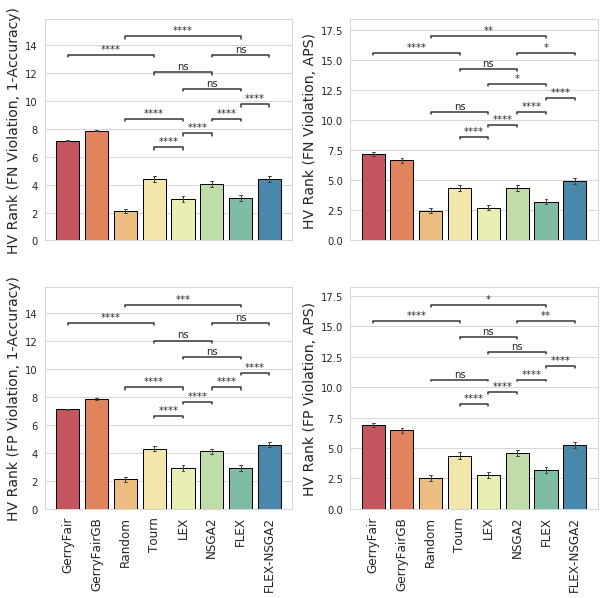

In [13]:
from statannot import add_stat_annotation
from itertools import combinations
plot_cols = [c for c in df_all.columns if 'hv' in c and 'auc' not in c]

g = plt.figure(figsize=(8.5,8.5))
j = 1
for col in plot_cols:
    
    print(col)
    # plot combined over datasets
    ax = g.add_subplot(2,2,j)
    sns.barplot(ax=ax,data=df_ranks,y='rank_'+col,x='method_nice',
                edgecolor=(0,0,0),capsize=0.1,errwidth=1,
                fill=True,palette='Spectral',
                order=OrderNice)
    box_pairs = [
        ("GerryFair", "Tourn"),
        ('LEX', 'Random'),
        ('FLEX', 'Random'),
        ("LEX", "FLEX"), 
        ("LEX", "Tourn"), 
        ("NSGA2", "Tourn"), 
        ("NSGA2",'FLEX-NSGA2'),
        ("LEX", "NSGA2"), 
        ("FLEX","NSGA2"),
        ("FLEX", "FLEX-NSGA2")]
    test_results = add_stat_annotation(ax, data=df_ranks, x='method_nice', y='rank_'+col, 
                                       order=OrderNice,
                                       perform_stat_test = False,
#                                        box_pairs = list(combinations(df_ranks.method_nice.unique(),2)),
                                       box_pairs=box_pairs,
                                   pvalues = [pvalues[col][','.join(bp)] for bp in box_pairs],
#                                    test='Wilcoxon', stats_params={'correction':True},
                                   text_format='star', loc='inside', verbose=2) 
    y1 = metric_nice[col.split('(')[-1].split(':')[0]]
    y2 = metric_nice[col.split(':')[-1][:-1]]
#     if j % 2 != 0:
    plt.ylabel('HV Rank (' + y1 +', '+y2+')',fontsize=14)
    plt.xticks(size=12)
#     else:
#         plt.ylabel('')
    if j > 2:
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    else:
        ax.set_xticklabels([])
    plt.xlabel('')
    j+=1 
    
        
g.tight_layout()
g.savefig('../paper/figs/'+rdir+'/'+'hv_ranks_all_'+col.replace('(','-').replace(':','-')[:-1] +'.pdf',
          bbox_inces='tight')

# time comparison

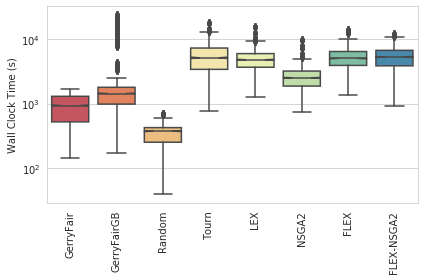

In [14]:
plot_cols = ['time']
import numpy as np
# for dataset,dfg in df_all.groupby('dataset'):
# for col in plot_cols:
# plt.figure(figsize=(4,4))
sns.boxplot(data=df_all, x='method_nice',y='time',notch=True, order=OrderNice, palette='Spectral')
#     plt.title(dataset)
plt.ylabel('Wall Clock Time (s)')
plt.xticks(rotation=90)
plt.xlabel('')
plt.gca().set_yscale('log')

    
plt.tight_layout()
plt.savefig('../paper/figs/'+rdir+'/time.pdf', bbox_inces='tight')